In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly 
import plotly.express as px

df = pd.read_csv(r"/Users/arthapillai/Downloads/hotel_bookings.csv")


In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score


In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
def family(df):
    if (df.adults>0 and df.babies>0 and df.children>0):
        val=1
    else:
        val=0
    return val
df['family']=df.apply(family,axis=1)

<AxesSubplot:>

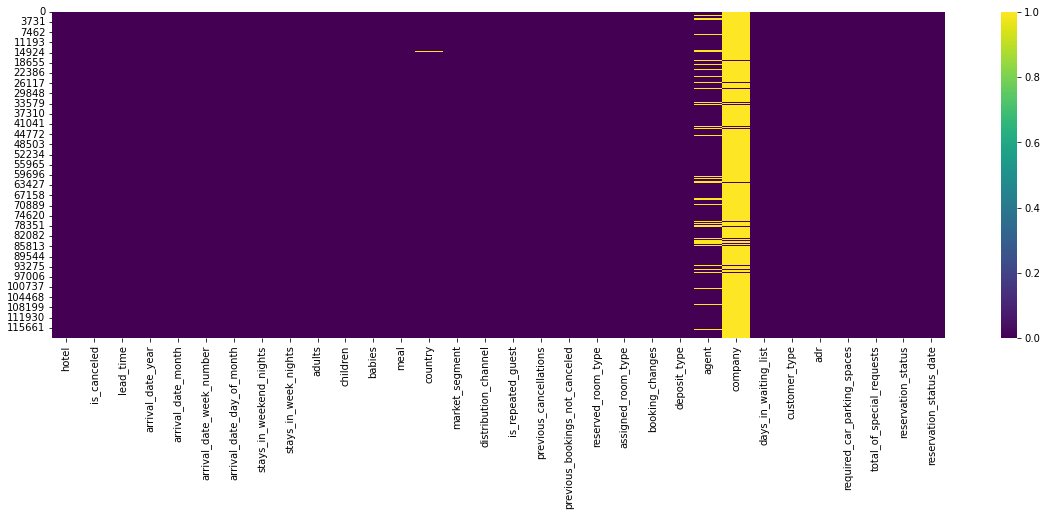

In [4]:
#Heatmap for null values
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),cmap='viridis')

Text(0.5, 1.0, 'Correlation between different values')

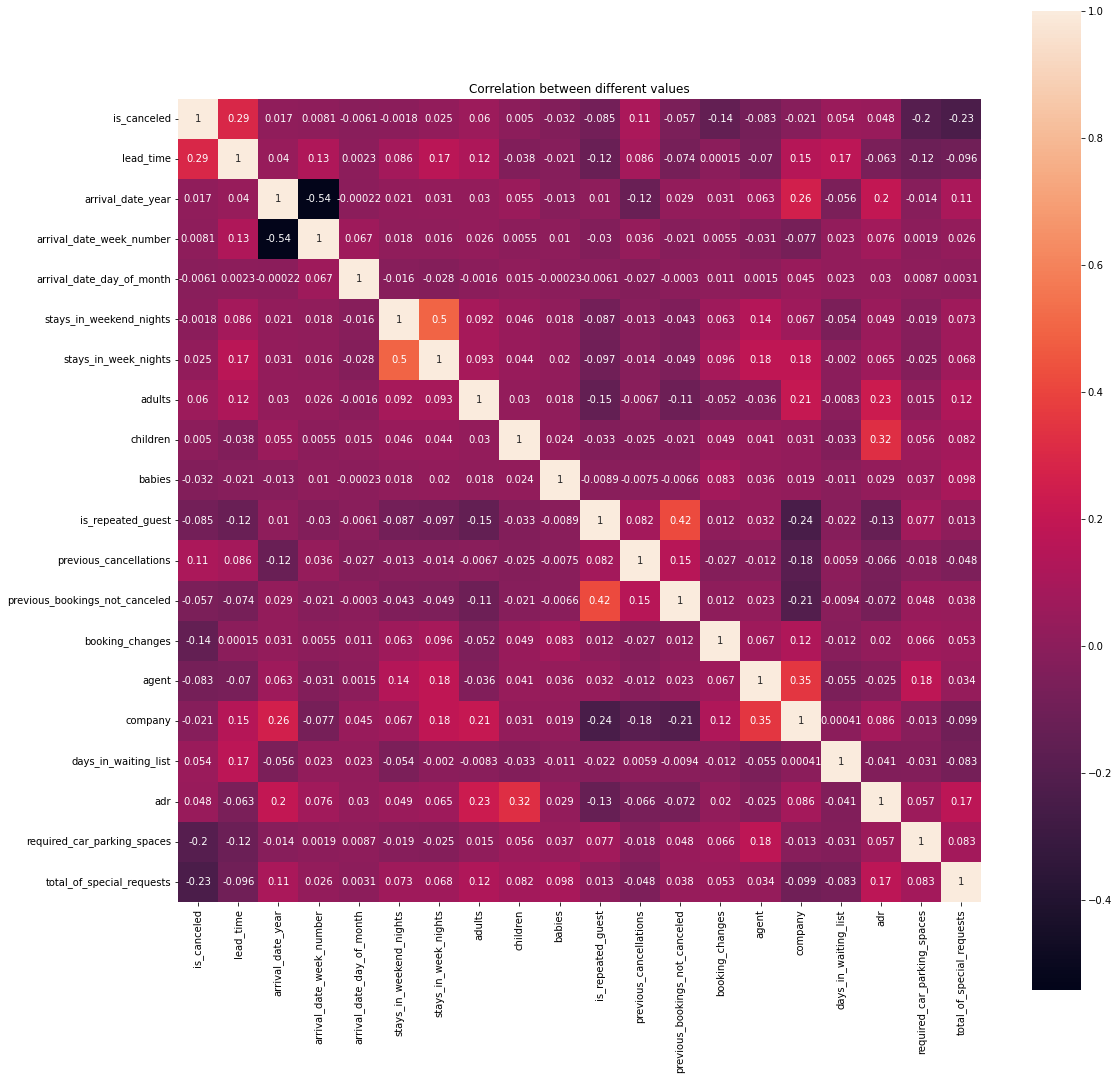

In [5]:
#Heatmap for correlation between values
correlation = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.title('Correlation between different values')

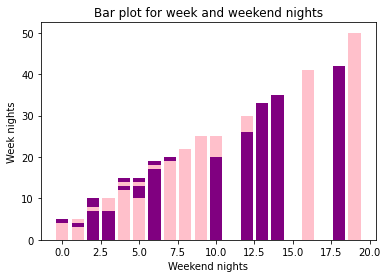

In [6]:
stays_in_weekend_nights = df['stays_in_weekend_nights']
stays_in_week_nights = df['stays_in_week_nights']
plt.bar(stays_in_weekend_nights, stays_in_week_nights,width = 0.8, color = ['pink', 'purple'])
plt.xlabel('Weekend nights')
plt.ylabel('Week nights')
plt.title('Bar plot for week and weekend nights')
plt.show()

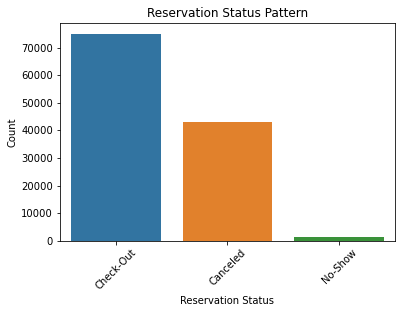

In [7]:
sns.countplot(x ='reservation_status', data = df)
plt.xticks(rotation=45)
plt.title("Reservation Status Pattern")
plt.xlabel("Reservation Status")
plt.ylabel("Count")

plt.show()

<AxesSubplot:xlabel='hotel', ylabel='lead_time'>

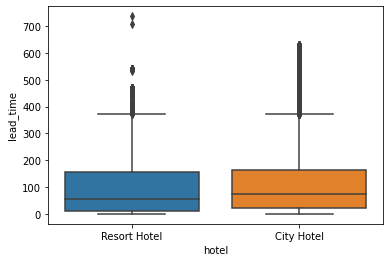

In [8]:
sns.boxplot(y = df['lead_time'], x = df['hotel'])

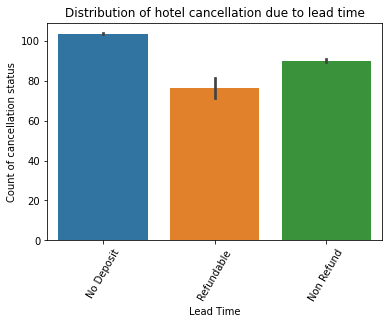

In [9]:
sns.barplot(x = df['deposit_type'], y =df['adr'], data = df)
plt.xticks(rotation=60, ha='center')
plt.title("Distribution of hotel cancellation due to lead time")
plt.xlabel("Lead Time")
plt.ylabel("Count of cancellation status")
  
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

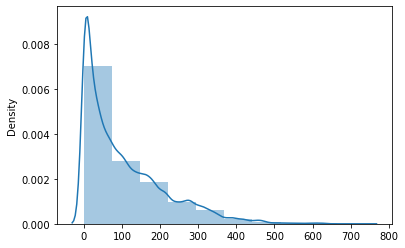

In [10]:
sns.distplot(x = df['lead_time'], bins = 10)

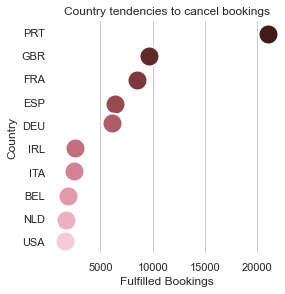

In [13]:
booking_country = pd.DataFrame(df.groupby('country').sum())
booking_country = booking_country.loc[:,['is_canceled','stays_in_week_nights','family']]
booking_country['booking_count'] = df.groupby('country').hotel.count()
booking_country['cancellation_rate'] =  booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfillment_rate'] =  1-booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfilled_bookings'] =  booking_country['booking_count']-booking_country['is_canceled']
sns.set(style="whitegrid")
toprint = booking_country.reset_index().sort_values(by='fulfilled_bookings', ascending=False).head(10)
g = sns.PairGrid(toprint, x_vars=toprint.columns[7:8], y_vars=['country'], height=4)
sns.despine(left=True, bottom=True)
g.map(sns.stripplot, size=20, orient="h", palette="ch:s=1,r=-.1,h=1_r", linewidth=2, edgecolor="w")
plt.xlabel('Fulfilled Bookings')
plt.ylabel('Country')
plt.title('Country tendencies to cancel bookings')
plt.show()

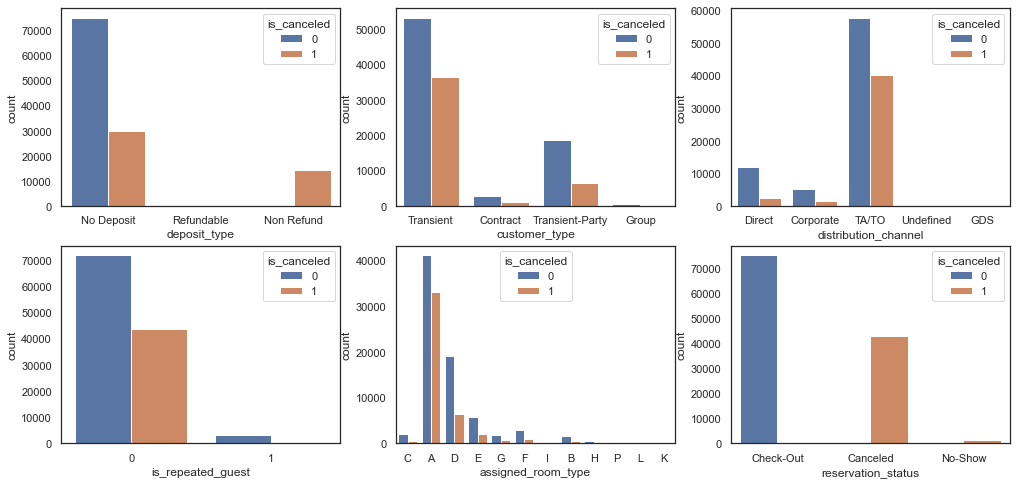

In [14]:
sns.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(17,8))
sns.countplot(data=df, x='deposit_type', hue='is_canceled', ax=axes[0][0])
sns.countplot(data=df, x='customer_type', hue='is_canceled', ax=axes[0][1])
sns.countplot(data=df, x='distribution_channel', hue='is_canceled', ax=axes[0][2])
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled', ax=axes[1][0])
sns.countplot(data=df, x='assigned_room_type', hue='is_canceled', ax=axes[1][1])
sns.countplot(data=df, x='reservation_status', hue='is_canceled', ax=axes[1][2])

plt.show()

In [15]:
df.groupby(["is_canceled"]).mean().reset_index()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,family
0,0,79.984687,2016.147514,27.080143,15.839529,0.928971,2.464053,1.829737,0.102347,0.010377,...,0.015792,0.202977,0.293364,94.055794,190.519265,1.589868,99.987693,0.0993,0.714060,0.001849
1,1,144.848815,2016.171920,27.309696,15.728066,0.925267,2.561912,1.901728,0.106513,0.003821,...,0.208348,0.025122,0.098340,75.179927,183.371117,3.564083,104.964333,0.0000,0.328826,0.000746


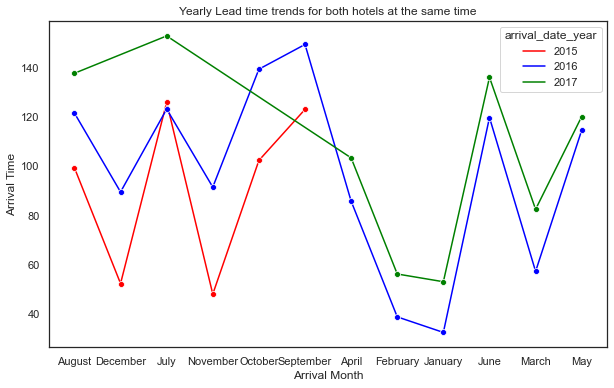

In [16]:
#plotting a graph with lead time per year for all the data.

data_line_plot=df[['arrival_date_year','arrival_date_month','lead_time']].groupby(['arrival_date_year',"arrival_date_month"]).mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Yearly Lead time trends for both hotels at the same time')
plt.xlabel('Arrival Month')
plt.ylabel('Arrival Time')
sns.lineplot(x='arrival_date_month',y='lead_time',data=data_line_plot,hue='arrival_date_year',marker='o',palette=['red','blue','green'])
plt.show()

In [17]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
df=df.drop(['agent','company'],axis=1)
df.country=df.country.fillna(df.country.mode()[0])
df.children=df.children.fillna(df.children.mean())

In [19]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [21]:
print('Unique values for hotel:\n', df.hotel.unique())
print('Unique values for arrival_date_month:\n', df.arrival_date_month.unique())
print('Unique values for customer_type:\n', df.customer_type.unique())
print('Unique values for reservation_status:\n', df.reservation_status.unique())
print('Unique values for deposit_type:\n',df.deposit_type.unique())
print('Unique values for reserved_room_type :\n',df.reserved_room_type .unique())
print('Unique values for assigned_room_type :\n',df.assigned_room_type .unique())
print('Unique values for distribution_channel :\n',df.distribution_channel .unique())
print('Unique values for market_segment :\n',df.market_segment.unique())
print('Unique values for meal :\n',df.meal.unique())

Unique values for hotel:
 ['Resort Hotel' 'City Hotel']
Unique values for arrival_date_month:
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique values for customer_type:
 ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values for reservation_status:
 ['Check-Out' 'Canceled' 'No-Show']
Unique values for deposit_type:
 ['No Deposit' 'Refundable' 'Non Refund']
Unique values for reserved_room_type :
 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values for assigned_room_type :
 ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values for distribution_channel :
 ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values for market_segment :
 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values for meal :
 ['BB' 'FB' 'HB' 'SC' 'Undefined']


In [22]:
# Transforming arrival date month names to numbers 1-12 for easier use and visualisation
df.arrival_date_month=df.arrival_date_month.map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

# transforming resort hotel and city hotel to 0 and 1 for easier use

df.hotel=df.hotel.map({'Resort Hotel':0 ,'City Hotel':1})

In [23]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family
0,0,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,0,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,0,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,0,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,0,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [24]:
le = LabelEncoder()
df1=df
df1.customer_type=le.fit_transform(df1.customer_type)
# changing the country strings to numerical data
df1.country=le.fit_transform(df1.country)
#Transforming all the data to numerical values to use those variables for correlation analysis and the model building
df1.deposit_type=le.fit_transform(df1.deposit_type)
df1.reserved_room_type=le.fit_transform(df1.reserved_room_type)
df1.assigned_room_type=le.fit_transform(df1.assigned_room_type)
df1.distribution_channel=le.fit_transform(df1.distribution_channel)
df1.market_segment=le.fit_transform(df1.market_segment)
df1.meal=le.fit_transform(df1.meal)

In [25]:
df1=df1.drop(['reservation_status','stays_in_weekend_nights','arrival_date_week_number','stays_in_weekend_nights',
              'arrival_date_day_of_month','meal','babies','children','reservation_status_date'],axis=1)

In [26]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,family
0,0,0,342,2015,7,0,2,135,3,1,...,2,2,3,0,0,2,0.0,0,0,0
1,0,0,737,2015,7,0,2,135,3,1,...,2,2,4,0,0,2,0.0,0,0,0
2,0,0,7,2015,7,1,1,59,3,1,...,0,2,0,0,0,2,75.0,0,0,0
3,0,0,13,2015,7,1,1,59,2,0,...,0,0,0,0,0,2,75.0,0,0,0
4,0,0,14,2015,7,2,2,59,6,3,...,0,0,0,0,0,2,98.0,0,1,0


In [27]:

y=df1['is_canceled']

#Dropping the 'is_canceled' from the columns
X=df1.drop(['is_canceled'],axis=1)

# Create the test/train split for our models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Predictive Models

In [42]:
def logreg(X_train, X_test, y_train, y_test):
    #Logistic Regression
    logreg = LogisticRegression(max_iter = 5000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y.prob=logreg.decision_function(X_test)
    acc_logreg = round(logreg.score(X_test, y_test) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)  
    print('Confusion matrix :\n',cm)
    print('Score :',logreg.score(X_test, y_test))
    print('Accuracy :',acc_logreg)
    print('Precision Score : %.3f' % precision_score(y_test, y_pred, zero_division = 1))
    print('Recall Score : %.3f' % recall_score(y_test, y_pred))

    logreg_fpr,logreg_tpr,threshold=roc_curve(y_test,y_pred)
    auc_logreg=auc(logreg_fpr,logreg_tpr)

def knn(X_train, X_test, y_train, y_test):
    #K-Nearest Neighbors
    knn = KNN()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_test, y_test) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)  
    print('Confusion matrix :\n',cm)
    print('Score :',knn.score(X_test, y_test))
    print('Accuracy :',acc_knn)
    print('Precision Score : %.3f' % precision_score(y_test, y_pred, zero_division = 1))
    print('Recall Score : %.3f' % recall_score(y_test, y_pred))

    knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_pred)
    auc_knn=auc(knn_fpr,knn_tpr)
def dtc(X_train, X_test, y_train, y_test):
    #DecisionTree
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    acc_dtc = round(dtc.score(X_test, y_test) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)  
    print('Confusion matrix :\n',cm)
    print('Score :',dtc.score(X_test, y_test))
    print('Accuracy :',acc_dtc)
    print('Precision Score : %.3f' % precision_score(y_test, y_pred))
    print('Recall Score : %.3f' % recall_score(y_test, y_pred))

    dtc_fpr,dtc_tpr,threshold=roc_curve(y_test,y_pred)
    auc_dtc = auc(dtc_fpr,dtc_tpr)
def  rf(X_train, X_test, y_train, y_test):
    #RandomForest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc_rf = round(rf.score(X_test, y_test) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)  
    print('Confusion matrix :\n',cm)
    print('Score :',rf.score(X_test, y_test))
    print('Accuracy :',acc_rf)
    print('Precision Score : %.3f' % precision_score(y_test, y_pred))
    print('Recall Score : %.3f' % recall_score(y_test, y_pred))

    rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred)
    auc_rf = auc(rf_fpr,rf_tpr)
def nbc(X_train, X_test, y_train, y_test):
    #Naive Bayes
    nbc = GaussianNB()
    nbc.fit(X_train, y_train)
    y_pred = nbc.predict(X_test)
    acc_nbc = round(nbc.score(X_test, y_test) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix :\n',cm)
    print('Score :',nbc.score(X_test, y_test))
    print('Accuracy :',acc_nbc)
    print('Precision Score : %.3f' % precision_score(y_test, y_pred))
    print('Recall Score : %.3f' % recall_score(y_test, y_pred))

    nbc_fpr,nbc_tpr,threshold=roc_curve(y_test,y_pred)
    auc_nbc = auc(nbc_fpr,nbc_tpr)
def svc(X_train, X_test, y_train, y_test):
    #SVC
    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc_svc = round(svc.score(X_test, y_test) * 100, 2)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix :\n',cm)
    print('Score :',svc.score(X_test, y_test))
    print('Accuracy :',acc_svc)
    print('Precision Score : %.3f' % precision_score(y_test, y_pred, zero_division = 1))
    print('Recall Score : %.3f' % recall_score(y_test, y_pred))

    svc_fpr,svc_tpr,threshold=roc_curve(y_test,y_pred)
    auc_svc = auc(svc_fpr,svc_tpr)
    

def allmodels():
    model_names=['Logistic Regression','Naive Bayes Classifier','Random Forest','k-Nearest Neighbors','Decision Tree Classifier','SVC(Support Vector Classification)']
    accuracy=[acc_logreg,acc_nbc,acc_rf,acc_knn,acc_dtc,acc_svc]
    auc=[auc_logreg,auc_nbc,auc_rf,auc_knn,auc_dtc,auc_svc]
    results=pd.DataFrame({'Model':model_names,'Accuracy':accuracy,'AUC':auc})
    results

if __name__ == "__main__":
    print("Logistic Regression:")
    logreg(X_train, X_test, y_train, y_test)
    print("\nK-Nearest Neighbors:")
    knn(X_train, X_test, y_train, y_test)
    print("\nDecisionTree:")
    dtc(X_train, X_test, y_train, y_test)
    print("\nRandomForest:")
    rf(X_train, X_test, y_train, y_test)
    print("\nNaive Bayes:")
    nbc(X_train, X_test, y_train, y_test)
    print("\nSupport Vector Classification:\n")
    svc(X_train, X_test, y_train, y_test)
    print("\n Performance Comparison between all models")
    allmodels()

Logistic Regression:
Confusion matrix :
 [[13797  1165]
 [ 3817  5099]]
Score : 0.7913560599715219
Accuracy : 79.14
Precision Score : 0.814
Recall Score : 0.572

K-Nearest Neighbors:
Confusion matrix :
 [[12869  2093]
 [ 2848  6068]]
Score : 0.7930731217019851
Accuracy : 79.31
Precision Score : 0.744
Recall Score : 0.681

DecisionTree:
Confusion matrix :
 [[13090  1872]
 [ 1772  7144]]
Score : 0.847390903760784
Accuracy : 84.74
Precision Score : 0.792
Recall Score : 0.801

RandomForest:
Confusion matrix :
 [[13923  1039]
 [ 1637  7279]]
Score : 0.8879303124214758
Accuracy : 88.79
Precision Score : 0.875
Recall Score : 0.816

Naive Bayes:
Confusion matrix :
 [[5592 9370]
 [ 922 7994]]
Score : 0.5689756260993383
Accuracy : 56.9
Precision Score : 0.460
Recall Score : 0.897

Support Vector Classification:

Confusion matrix :
 [[13696  1266]
 [ 5317  3599]]
Score : 0.7243068933746545
Accuracy : 72.43
Precision Score : 0.740
Recall Score : 0.404

 Performance Comparison between all models


NameError: name 'acc_logreg' is not defined